<a href="https://colab.research.google.com/github/2303a52163/Generative-AI-2025/blob/main/2303A52163_WEEK_7_2_ASSIGNMENT_7_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Design a multilayer ANN architecture according to the requirements shown below.
Train, test, save (.h5) and deploy the model to diagnose diabatic disease using the Keras deep
learning library
2. (1 ponto) Calculate training and testing accuracy, build confusion matrix, also calculate recall,
precision and F1-score.
3. (1 ponto) Build the application by loading the saved ANN modeL
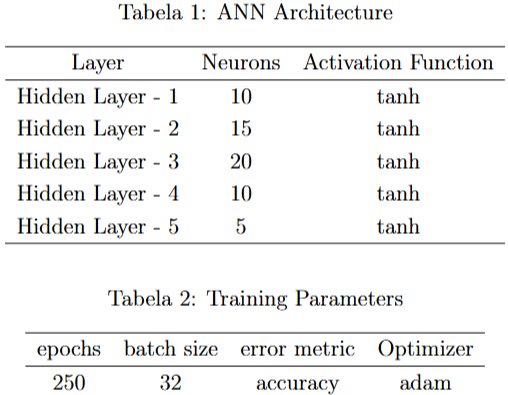

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - accuracy: 0.6372 - loss: 0.6743 - val_accuracy: 0.7792 - val_loss: 0.6260
Epoch 2/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7129 - loss: 0.6193 - val_accuracy: 0.7403 - val_loss: 0.5810
Epoch 3/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7162 - loss: 0.5788 - val_accuracy: 0.7532 - val_loss: 0.5552
Epoch 4/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7431 - loss: 0.5513 - val_accuracy: 0.7403 - val_loss: 0.5389
Epoch 5/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7599 - loss: 0.5230 - val_accuracy: 0.7403 - val_loss: 0.5292
Epoch 6/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.7441 - loss: 0.5393 - val_accuracy: 0.7662 - val_loss: 0.5229
Epoch 7/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.7717 - loss: 0.5080 - val_accuracy: 0.7662 - val_loss: 0.5189
Epoch 8/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.7781 - loss: 0.4923 - val_accuracy: 0.7

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Accuracy: 0.6753
Precision: 0.5758
Recall: 0.6333
F1 Score: 0.6032
Confusion Matrix:
[[33 14]
 [11 19]]


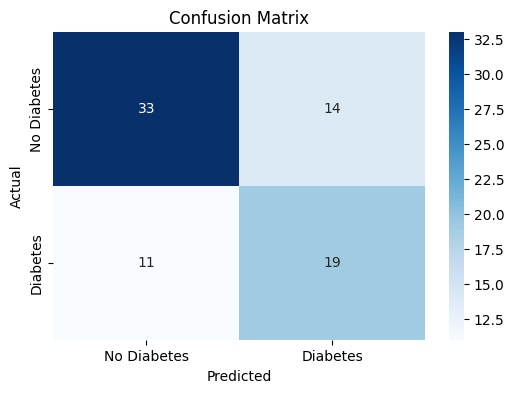

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('/content/diabetes.csv')

x = data.drop('Outcome', axis=1)
y = data['Outcome']

x_train, x_test1, y_train, y_test1 = train_test_split(x, y, test_size=0.2, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_test1, y_test1, test_size=0.5, random_state=42)

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)
x_val_scaled = scaler.transform(x_val)

def diabetes_prediction_model(shape):
    model = Sequential()
    model.add(Dense(10, activation='tanh', input_shape=(shape,)))
    model.add(Dense(15, activation='tanh'))
    model.add(Dense(20, activation='tanh'))
    model.add(Dense(10, activation='tanh'))
    model.add(Dense(5, activation='tanh'))
    model.add(Dense(1, activation='sigmoid'))
    return model

diabetes_model = diabetes_prediction_model(x_train.shape[1])

diabetes_model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

history = diabetes_model.fit(x_train_scaled, y_train, validation_data=(x_val_scaled, y_val), epochs=250, batch_size=32)

diabetes_model.save('diabetes_model.h5')

loaded_model = load_model('diabetes_model.h5')

y_pred = (loaded_model.predict(x_test_scaled) > 0.5).astype('int')
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print('Confusion Matrix:')
print(conf_matrix)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
